# Factors that affect Crime in India and How

## Introduction

This is the Data Science Project of USN 1MS18IS134 - Rithvik Konappa Reddy
The objective of this notebook is to explore the various factors that have affected Crime in India, and if they have how so? Therefore, we worked on various datasets such as the number of Crimes reported in India, the various political parties in power, the literacy rate, the police strength and the population. All this data was divided statewise and for the years 2009-2011. The data was obtained from official government sources such as the National Crime Records Bureau (NCRB) and various other surverys conducted by the Govt. of India.

This notebook contains 5 parts:
<ol>
    <li>Introduction</li>
    <li>Data Preparation</li>
    <li>Data Cleaning</li>
    <li>Data Analysis</li>
    <li>Data Prediciton</li>
    <li>Data Visualisation</li>
    <li>Conclusion</li>
</ol>

In the Introduction part, we simply start importing the libraries and the datasets we need

In [1]:
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import pylab as py
import statsmodels.api as sm
import numpy as np
import datetime as dt
from tqdm import tqdm
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

df_crime = pd.read_csv("Age-group-wise and sex-wise break-up of persons arrested under IPC crimes - 2009.csv")
df = pd.read_csv("CM.csv")

print(df_crime.shape, df.shape)

(1317, 15) (520, 23)


In [2]:
df_crime.head()

,SL,STATE/UT,Below 18 Years,Unnamed: 3,Between 18-30 Years,Unnamed: 5,Between 30-45 Years,Unnamed: 7,Between 45-60 Years,Unnamed: 9,Above 60 Years,Unnamed: 11,Total,Unnamed: 13,Grand Total
0,NaN,NaN,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,NaN
1,NaN,NaN,B18M,B18F,B30M,B30F,B45M,B45F,B60M,B60F,A60M,A60F,TOTM,TOTF,GTOT
2,1,ANDHRA PRADESH,28,0,1667,136,1712,155,788,68,45,5,4240,364,4604
3,2,ARUNACHAL PRADESH,0,0,43,0,35,0,5,0,0,0,83,0,83
4,3,ASSAM,13,1,721,14,856,17,191,10,43,0,1824,42,1866


In [3]:
df.head()

,State_Name,Assembly_No,Sequence_No,pid_CM,No_Terms_as_CM,Name,Start_Date,End_Date,Days_in_Office,Party,...,Caretaker_CM,Constituency_No,Poll_No,Position,Constituency_Name,pid_IED,No_Terms_as_MLA,Turncoat,Incumbent,Recontest
0,Andaman and Nicobar Islands,NaN,NaN,NaN,NaN,Bishnu Pada Roy,01/07/05,10/04/14,39730,BJP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chandigarh,NaN,NaN,NaN,NaN,Pawan Kumar Bansal,22/05/09,18/05/14,1822,INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daman and Diu,NaN,NaN,NaN,NaN,Lalubhai Patel,31/08/09,31/04/14,#VALUE!,BJP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,NaN,NaN,NaN,NaN,Manmohan Singh,22/05/04,25/05/14,3655,INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jammu and Kashmir,NaN,NaN,NaN,NaN,Omar Abdullah,05/01/09,08/01/15,2194,JKNC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br><br>
As we can see, the data requires extensive preparation and cleaning before any analysis can be performed.
<br>

## Data Preparation & Data Cleaning

Although, these contents were separated in the Introduction, it was observed that Data Preparation and Data Cleaning go hand-in-hand and is not mutually exclusive. This will be proved as we progress ahead.

In this part, we consolidated the Crime data as shown in the image below to Statewise Crime numbers according to the various categories of crime under IPC. Unfortunately, this part of the process could not be automated and had to be manually prepared.

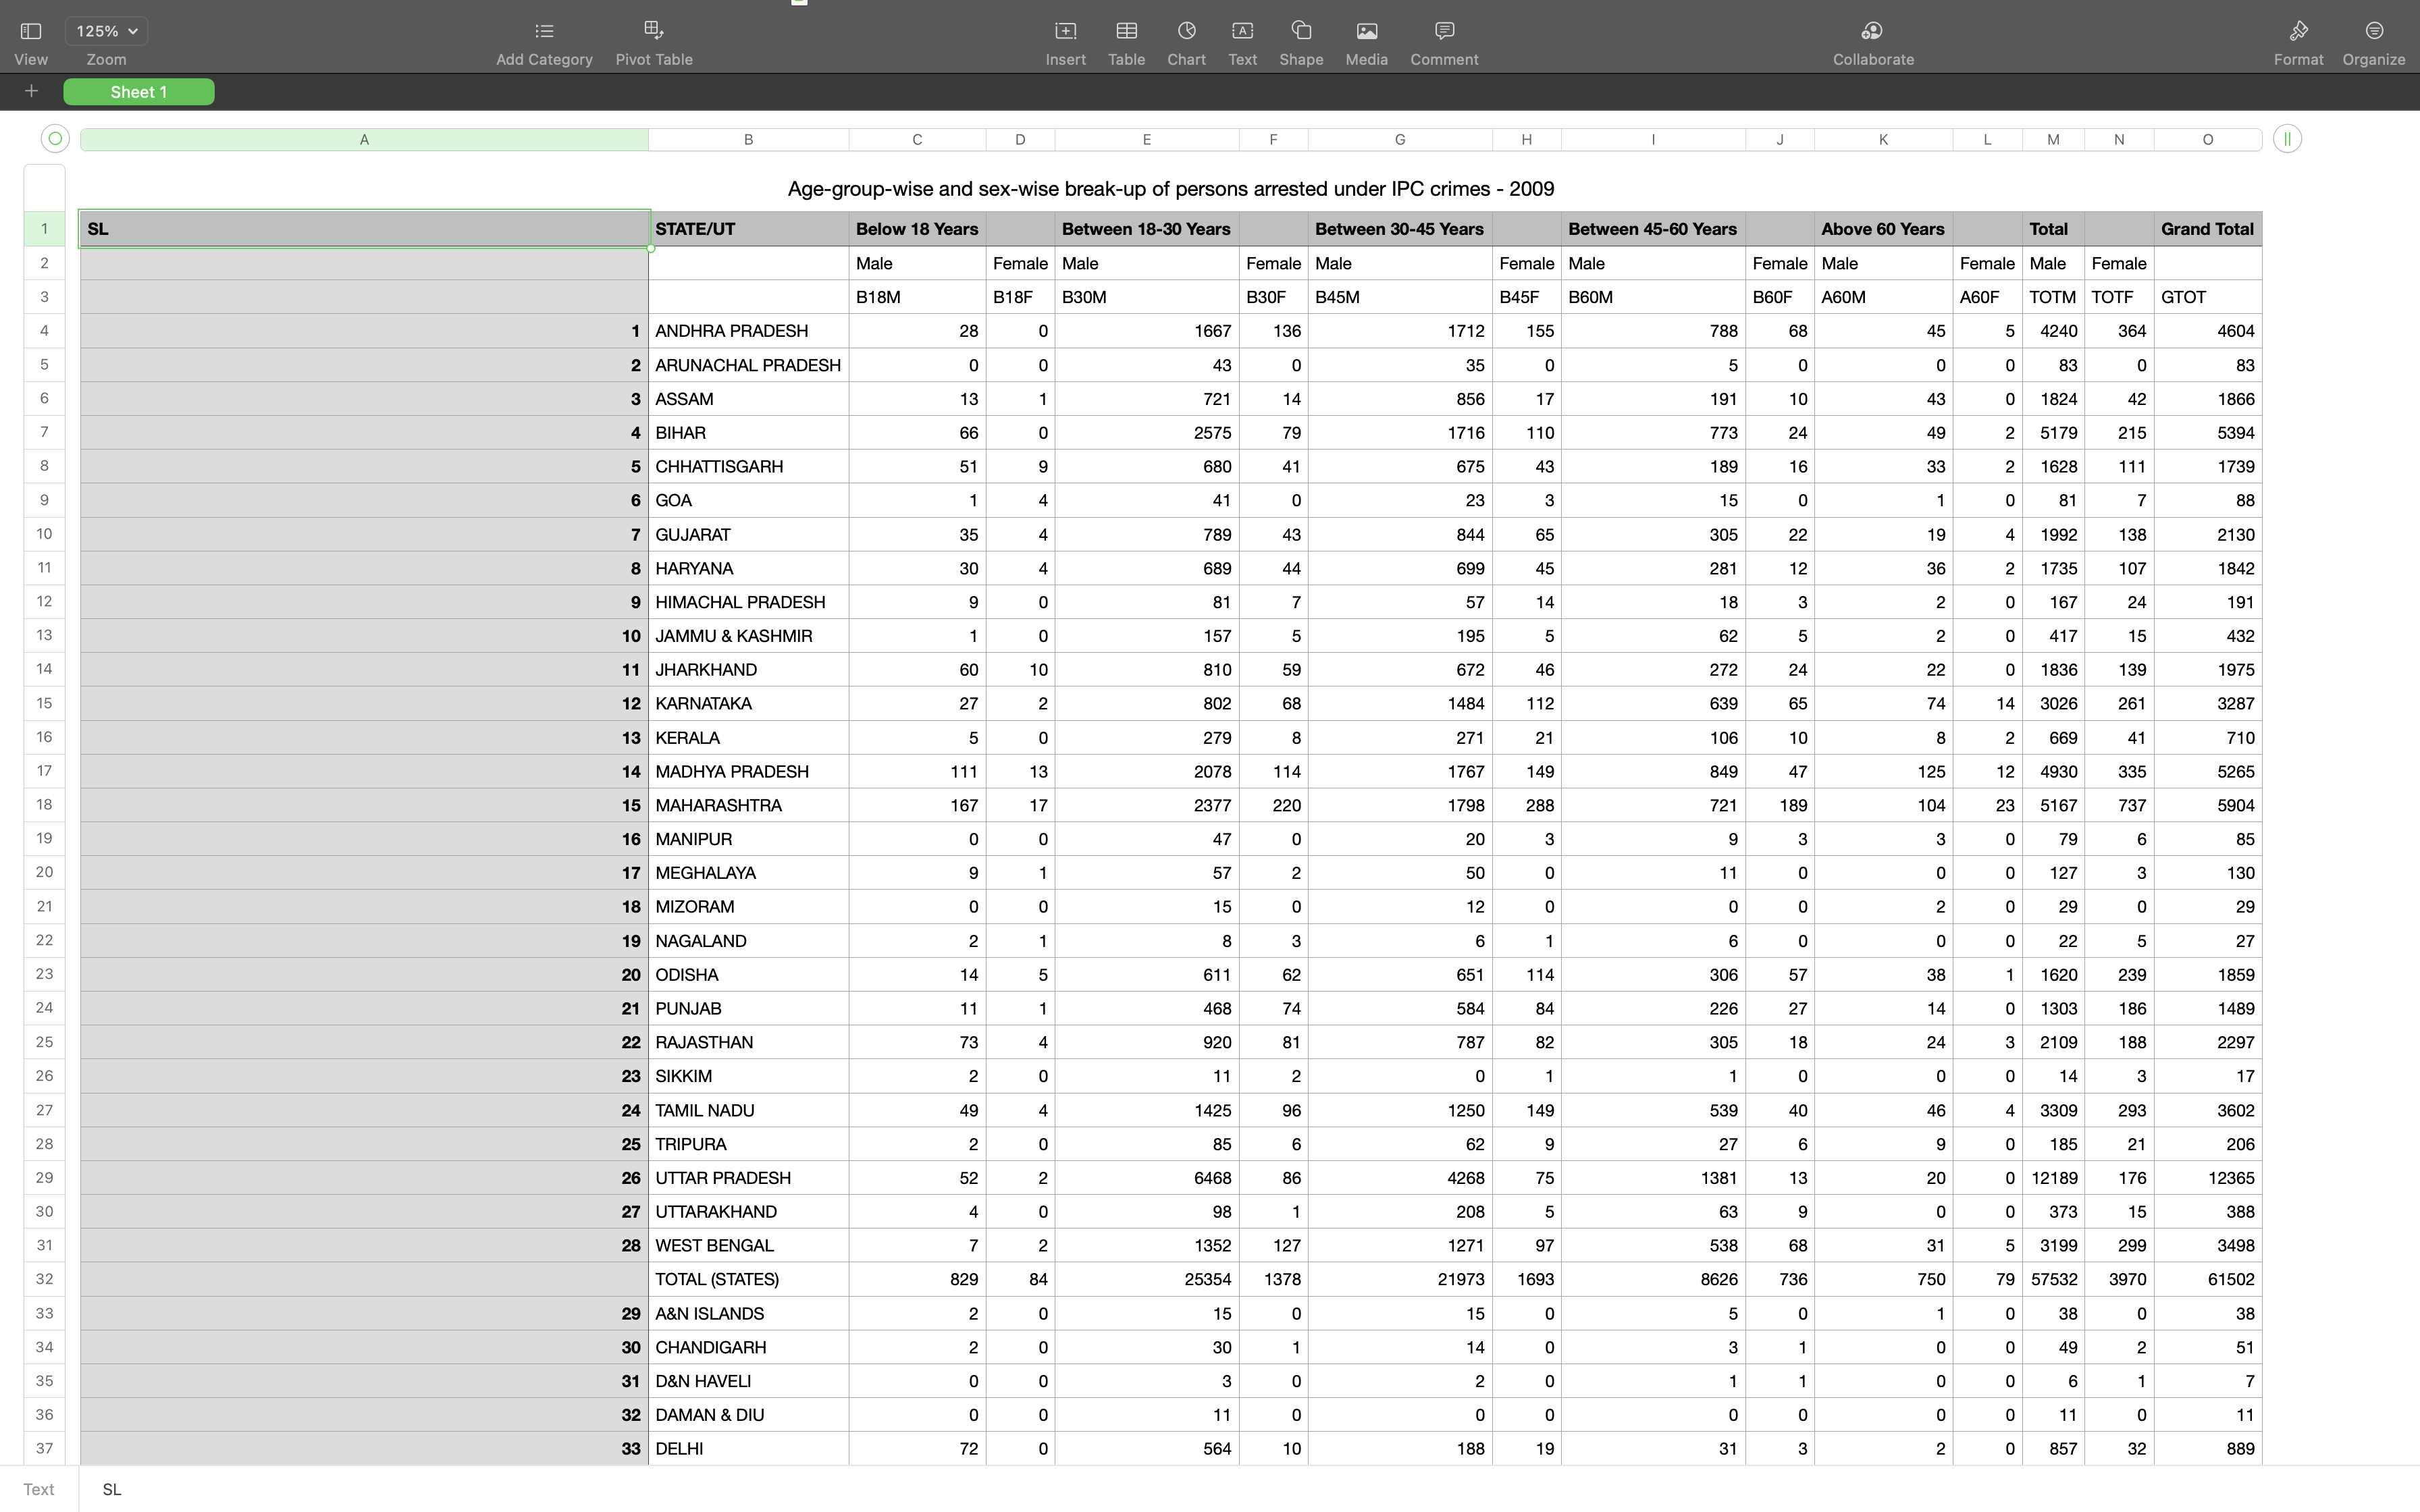

<br><br>
As shown, the data is spread sex-wise and age-group-wise for various categories of crime for each state. We required the total number for each state and for each category. After extensive cleaning up and consoldating of the data manually, we were able to make it statewise.
<br><br>

In [4]:
df_2009 = pd.read_csv("CrimeRate_2009_2.csv")
df_2009.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,ANDHRA PRADESH,4604.0,3065.0,240.0,1487.0,0.0,1487.0,2521.0,1889.0,...,1230.0,65042.0,1220.0,5441.0,4178.0,19018.0,0.0,11301.0,68539.0,234920.0
1,2,ARUNACHAL PRADESH,83.0,48.0,4.0,60.0,0.0,60.0,61.0,38.0,...,25.0,739.0,0.0,70.0,2.0,12.0,0.0,71.0,831.0,2817.0
2,3,ASSAM,1866.0,559.0,56.0,1644.0,0.0,1644.0,2875.0,2392.0,...,877.0,9487.0,297.0,1614.0,15.0,5753.0,1.0,2639.0,16705.0,71627.0
3,4,BIHAR,5394.0,6169.0,385.0,1086.0,0.0,1086.0,4727.0,2397.0,...,1120.0,26915.0,2908.0,795.0,16.0,4939.0,17.0,3455.0,87779.0,205005.0
4,5,CHHATTISGARH,1739.0,1350.0,31.0,1128.0,0.0,1128.0,373.0,267.0,...,324.0,16261.0,353.0,1817.0,235.0,2462.0,0.0,1970.0,24849.0,67070.0


<br><br>
This was prepared for the other two years as well.
<br><br>

In [5]:
df_2010 = pd.read_csv("CrimeRate_2010.csv")
df_2010.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,A&N ISLANDS,7.0,39.0,5.0,39.0,0.0,39.0,18.0,11.0,...,10.0,105.0,0.0,40.0,14.0,12.0,0.0,9.0,478.0,1028.0
1,2,ANDHRA PRADESH,4239.0,3173.0,266.0,1761.0,0.0,1761.0,2543.0,1722.0,...,972.0,68228.0,1322.0,4622.0,3820.0,21572.0,0.0,11851.0,55789.0,228605.0
2,3,ARUNACHAL PRADESH,103.0,58.0,3.0,49.0,0.0,49.0,81.0,48.0,...,30.0,595.0,0.0,88.0,1.0,11.0,0.0,83.0,788.0,2825.0
3,4,ASSAM,1537.0,471.0,43.0,1629.0,5.0,1624.0,3190.0,2687.0,...,826.0,8132.0,263.0,2020.0,35.0,6208.0,0.0,2471.0,15566.0,69890.0
4,5,BIHAR,5207.0,5418.0,547.0,892.0,0.0,892.0,4518.0,2503.0,...,940.0,23058.0,2508.0,808.0,22.0,3850.0,26.0,3459.0,89073.0,196289.0


In [6]:
df_2011 = pd.read_csv("CrimeRate_2011.csv")
df_2011.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,A&N ISLANDS,18.0,19.0,4.0,28.0,0.0,28.0,16.0,14.0,...,4.0,106.0,0.0,15.0,7.0,8.0,0.0,4.0,386.0,828.0
1,2,ANDHRA PRADESH,5584.0,4239.0,286.0,1758.0,0.0,1758.0,2461.0,1698.0,...,1186.0,73852.0,1400.0,4554.0,4122.0,20719.0,0.0,11837.0,54854.0,238564.0
2,3,ARUNACHAL PRADESH,62.0,27.0,3.0,47.0,0.0,47.0,100.0,67.0,...,31.0,578.0,0.0,69.0,0.0,16.0,0.0,86.0,534.0,2312.0
3,4,ASSAM,1666.0,554.0,48.0,1470.0,0.0,1470.0,3279.0,2838.0,...,831.0,8159.0,146.0,1794.0,26.0,4894.0,2.0,2413.0,16082.0,67146.0
4,5,BIHAR,8898.0,8192.0,562.0,1185.0,1.0,1184.0,5721.0,3565.0,...,1206.0,37623.0,3900.0,1036.0,9.0,5134.0,26.0,5604.0,86175.0,252349.0


<br><br>
As we can see, some of the data is not in the same order and we require the total count of the crimes commited, hence grouping was done and the felony/misdemeanor ratio was found. 
Felony - a major crime - Punished by a fine, by imprisonment, or both. This includes :- 
<ol>
    <li>Murder</li>
    <li>Robbery</li>
    <li>Rape</li>
    <li>Kidnapping</li>
</ol>
Midemeanor - a less serious crime - Punished by a fine, jail time, or both. This includes :-
<ol>
    <li>Driving without license</li>
    <li>Theft</li>
    <li>Simple Assault</li>
    <li>Disorderly Conduct</li>
    <li>Trespass</li>
</ol>

We consolidated the entire dataset over the three years and later split it year-wise again.
<br><br>

In [7]:
df_2009.dropna(inplace=True)
df_2010.dropna(inplace=True)
df_2011.dropna(inplace=True)
df_2009.sort_values(by=['STATE/UT'], inplace=True, ignore_index=True)
df_2009.loc[0, ["STATE/UT"]] = df_2010.iloc[0]["STATE/UT"]
df_all = pd.concat([df_2009, df_2010, df_2011])
df_all.dropna(inplace=True, axis=1)
df_all.drop(['C30'], axis=1, inplace=True)
df_all['Felony'] = df_all.iloc[:, 2:14].sum(axis=1)
df_all['TotalCrimes'] = df_all.iloc[:, 14:].sum(axis=1)
df_all['Misdemeanor'] = df_all['TotalCrimes']-df_all['Felony']
df_all['FelonyRatio'] = df_all['Felony']/df_all['TotalCrimes']
df_all['MisdemeanorRatio'] = df_all['Misdemeanor']/df_all['TotalCrimes']
df_2009, df_2010, df_2011 = np.array_split(df_all, 3)

In [8]:
df_2009.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C25,C26,C27,C28,C29,Felony,TotalCrimes,Misdemeanor,FelonyRatio,MisdemeanorRatio
0,29,A&N ISLANDS,38.0,5.0,7.0,36.0,0.0,36.0,16.0,5.0,...,8.0,35.0,0.0,1.0,417.0,171.0,1208.0,1037.0,0.141556,0.858444
1,1,ANDHRA PRADESH,4604.0,3065.0,240.0,1487.0,0.0,1487.0,2521.0,1889.0,...,4178.0,19018.0,0.0,11301.0,68539.0,17427.0,257362.0,239935.0,0.067714,0.932286
2,2,ARUNACHAL PRADESH,83.0,48.0,4.0,60.0,0.0,60.0,61.0,38.0,...,2.0,12.0,0.0,71.0,831.0,477.0,3271.0,2794.0,0.145827,0.854173
3,3,ASSAM,1866.0,559.0,56.0,1644.0,0.0,1644.0,2875.0,2392.0,...,15.0,5753.0,1.0,2639.0,16705.0,13656.0,86134.0,72478.0,0.158544,0.841456
4,4,BIHAR,5394.0,6169.0,385.0,1086.0,0.0,1086.0,4727.0,2397.0,...,16.0,4939.0,17.0,3455.0,87779.0,28745.0,219501.0,190756.0,0.130956,0.869044


In [9]:
df_2010.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C25,C26,C27,C28,C29,Felony,TotalCrimes,Misdemeanor,FelonyRatio,MisdemeanorRatio
0,1,A&N ISLANDS,7.0,39.0,5.0,39.0,0.0,39.0,18.0,11.0,...,14.0,12.0,0.0,9.0,478.0,174.0,1174.0,1000.0,0.148211,0.851789
1,2,ANDHRA PRADESH,4239.0,3173.0,266.0,1761.0,0.0,1761.0,2543.0,1722.0,...,3820.0,21572.0,0.0,11851.0,55789.0,17842.0,253717.0,235875.0,0.070322,0.929678
2,3,ARUNACHAL PRADESH,103.0,58.0,3.0,49.0,0.0,49.0,81.0,48.0,...,1.0,11.0,0.0,83.0,788.0,573.0,3331.0,2758.0,0.172020,0.827980
3,4,ASSAM,1537.0,471.0,43.0,1629.0,5.0,1624.0,3190.0,2687.0,...,35.0,6208.0,0.0,2471.0,15566.0,13668.0,83788.0,70120.0,0.163126,0.836874
4,5,BIHAR,5207.0,5418.0,547.0,892.0,0.0,892.0,4518.0,2503.0,...,22.0,3850.0,26.0,3459.0,89073.0,25582.0,211439.0,185857.0,0.120990,0.879010


In [10]:
df_2011.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C25,C26,C27,C28,C29,Felony,TotalCrimes,Misdemeanor,FelonyRatio,MisdemeanorRatio
0,1,A&N ISLANDS,18.0,19.0,4.0,28.0,0.0,28.0,16.0,14.0,...,7.0,8.0,0.0,4.0,386.0,136.0,933.0,797.0,0.145766,0.854234
1,2,ANDHRA PRADESH,5584.0,4239.0,286.0,1758.0,0.0,1758.0,2461.0,1698.0,...,4122.0,20719.0,0.0,11837.0,54854.0,20427.0,265326.0,244899.0,0.076988,0.923012
2,3,ARUNACHAL PRADESH,62.0,27.0,3.0,47.0,0.0,47.0,100.0,67.0,...,0.0,16.0,0.0,86.0,534.0,508.0,2779.0,2271.0,0.182800,0.817200
3,4,ASSAM,1666.0,554.0,48.0,1470.0,0.0,1470.0,3279.0,2838.0,...,26.0,4894.0,2.0,2413.0,16082.0,13592.0,80243.0,66651.0,0.169385,0.830615
4,5,BIHAR,8898.0,8192.0,562.0,1185.0,1.0,1184.0,5721.0,3565.0,...,9.0,5134.0,26.0,5604.0,86175.0,35394.0,267835.0,232441.0,0.132149,0.867851


<br><br>
Now, coming to the Chief Ministers of India dataset (to represent the political party in power), we were to acquire a consolidated dataset of all CMs since 1950. But we required the year-wise split of the political party in power, but the dataset we had had the start-date and the end-date. Using code we were able to solve this problem to split it year-wise.
<br><br><br><br>

In [11]:
df.head()

,State_Name,Assembly_No,Sequence_No,pid_CM,No_Terms_as_CM,Name,Start_Date,End_Date,Days_in_Office,Party,...,Caretaker_CM,Constituency_No,Poll_No,Position,Constituency_Name,pid_IED,No_Terms_as_MLA,Turncoat,Incumbent,Recontest
0,Andaman and Nicobar Islands,NaN,NaN,NaN,NaN,Bishnu Pada Roy,01/07/05,10/04/14,39730,BJP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chandigarh,NaN,NaN,NaN,NaN,Pawan Kumar Bansal,22/05/09,18/05/14,1822,INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daman and Diu,NaN,NaN,NaN,NaN,Lalubhai Patel,31/08/09,31/04/14,#VALUE!,BJP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Delhi,NaN,NaN,NaN,NaN,Manmohan Singh,22/05/04,25/05/14,3655,INC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jammu and Kashmir,NaN,NaN,NaN,NaN,Omar Abdullah,05/01/09,08/01/15,2194,JKNC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['End_Date'] = pd.to_datetime(df['End_Date'], errors="coerce")
df[(df['Start_Date'] < dt.datetime(2012, 1, 1)) & (df['End_Date'] > dt.datetime(2009, 1, 1))]
df1 = pd.DataFrame(columns=['Year'])
df = df.join(df1, how="outer")
def year_wise(df):
    updated_df = pd.DataFrame(columns=["Year", "State_Name", "Name", "Start_Date", "End_Date", "Party"])
    for i in tqdm (range(0, len(df))):
        start_date = df.iloc[i]["Start_Date"]
        start_year = df.iloc[i]["Start_Date"].year
        end_year = df.iloc[i]["End_Date"].year
        end_date = df.iloc[i]["End_Date"]
        state_name = df.iloc[i]["State_Name"]
        name = df.iloc[i]["Name"]
        party = df.iloc[i]["Party"]
        while(start_year<=end_year):
            temp_df = {"Year": start_year, "State_Name": state_name, "Name": name, "Start_Date": start_date, "End_Date": end_date, "Party": party}
            updated_df = updated_df.append(temp_df, ignore_index=True)
            start_year += 1 
    return updated_df
            
new_df = year_wise(df)
new_df.head()

100%|██████████| 520/520 [00:08<00:00, 64.05it/s]


,Year,State_Name,Name,Start_Date,End_Date,Party
0,2005,Andaman and Nicobar Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,2006,Andaman and Nicobar Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
2,2007,Andaman and Nicobar Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
3,2008,Andaman and Nicobar Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
4,2009,Andaman and Nicobar Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP


<br><br>
With this, we were able to split the dataset year-wise. Next using excel, we filtered the data for the years we required and created separate datasets for the year 2009, 2010 and 2011.
<br><br><br><br>

In [13]:
df_cm_2009 = pd.read_csv("Updated_CM_2009.csv")
df_cm_2010 = pd.read_csv("Updated_CM_2010.csv")
df_cm_2011 = pd.read_csv("Updated_CM_2011.csv")

In [14]:
df_cm_2009.head()

,Year,State_Name,Name,Start_Date,End_Date,Party
0,2009,A&N Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,2009,Chandigarh,Pawan Kumar Bansal,2009-05-22,2014-05-18,INC
2,2009,Delhi,Manmohan Singh,2004-05-22,2014-05-25,INC
3,2009,Jammu and Kashmir,Omar Abdullah,2009-05-01,2015-08-01,JKNC
4,2009,Lakshadweep,Muhammed Hamdulla Sayeed,2009-05-18,2014-05-18,INC


In [15]:
df_cm_2010.head()

,Unnamed: 0,Year,State_Name,Name,Start_Date,End_Date,Party
0,5,2010,A&N Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,11,2010,Chandigarh,Pawan Kumar Bansal,2009-05-22,2014-05-18,INC
2,22,2010,Delhi,Manmohan Singh,2004-05-22,2014-05-25,INC
3,28,2010,Jammu & Kashmir,Omar Abdullah,2009-05-01,2015-08-01,JKNC
4,35,2010,Lakshadweep,Muhammed Hamdulla Sayeed,2009-05-18,2014-05-18,INC


In [16]:
df_cm_2011.head()

,Unnamed: 0,Year,State_Name,Name,Start_Date,End_Date,Party
0,6,2011,A&N Islands,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,12,2011,Chandigarh,Pawan Kumar Bansal,2009-05-22,2014-05-18,INC
2,23,2011,Delhi,Manmohan Singh,2004-05-22,2014-05-25,INC
3,29,2011,Jammu & Kashmir,Omar Abdullah,2009-05-01,2015-08-01,JKNC
4,36,2011,Lakshadweep,Muhammed Hamdulla Sayeed,2009-05-18,2014-05-18,INC


Other datasets, such as the population strength and literacy rate were manually entered and compiled into a dataset.

In [17]:
cdf = pd.read_csv("Compiled Datasets.csv", thousands=',')
cdf["POPULATION 2011"] = pd.to_numeric(cdf["POPULATION 2011"])
cdf = cdf.rename({"State" : "STATE/UT"}, axis = 1)
cdf["STATE/UT"] = cdf["STATE/UT"].str.upper()
cdf.head()

,STATE/UT,POPULATION 2011,Unnamed: 2,2009 % of LR,LR 2009,2010 % of LR,LR 2010,2011 % of LR,LR 2011,Unnamed: 9,"2,009.00","2,010.00","2,011.00",Unnamed: 13,"2,009.00.1",Unnamed: 15
0,A&N ISLANDS,380581.0,NaN,82.3,314033.75,83.4,318231.04,0.86,329296.63,NaN,4209.0,4223.0,4352.0,NaN,BJP,Bishnu Pada Roy
1,ANDHRA PRADESH,49577103.0,NaN,60.5,5126467.50,76.1,6448333.50,0.15,12710.25,NaN,93000.0,95370.0,99687.0,NaN,INC,Dr.Y.S. Rajasekhara Reddy
2,ARUNACHAL PRADESH,1383727.0,NaN,54.3,67386.30,78.3,97170.30,0.14,173.74,NaN,3423.0,3506.0,3559.0,NaN,INC,Dorjee Khandu
3,ASSAM,31205576.0,NaN,63.3,1934954.40,85.3,2607450.40,0.11,3362.48,NaN,27900.0,28694.0,28694.0,NaN,INC,Shri Tarun Gogoi
4,BIHAR,104099452.0,NaN,47.0,4592840.00,71.9,7026068.00,0.20,19544.00,NaN,46973.0,49915.0,54196.0,NaN,JD(U),Nitish Kumar


<br><br>
Data cleaning is one of the most importants part of data science. As with most datasets, these dataset required data cleaning. Much of the cleaning for the Crime dataset was performed during the data preparation, such as the dropping of columns and rows with NAN values etc. Now, coming to the CM dataset, we need the states to have the same name as the Crime datasets to enable joining/merging them. And the column name should also be the same.

Since we transformed a range set to a discrete set, there could be some duplicates in the CM dataset (if there was a change in the CM that year). Hence, we dropped the duplicates and kept the last entry for simplicity. 
<br><br><br><br>

In [18]:
df_cm_2009.drop_duplicates(subset ="State_Name", keep = "last", inplace = True)
df_cm_2009.sort_values(by=["State_Name"], inplace = True, ignore_index = True)
df_cm_2009["State_Name"] = df_cm_2009["State_Name"].str.upper()
df_cm_2009 = df_cm_2009.rename({"State_Name" : "STATE/UT"}, axis = 1)

df_cm_2010.drop_duplicates(subset ="State_Name", keep = "last", inplace = True)
df_cm_2010.sort_values(by=["State_Name"], inplace = True, ignore_index = True)
df_cm_2010["State_Name"] = df_cm_2010["State_Name"].str.upper()
df_cm_2010 = df_cm_2010.rename({"State_Name" : "STATE/UT"}, axis = 1)

df_cm_2011.drop_duplicates(subset ="State_Name", keep = "last", inplace = True)
df_cm_2011.sort_values(by=["State_Name"], inplace = True, ignore_index = True)
df_cm_2011["State_Name"] = df_cm_2011["State_Name"].str.upper()
df_cm_2011 = df_cm_2011.rename({"State_Name" : "STATE/UT"}, axis = 1)

In [19]:
df_cm_2009.head()

,Year,STATE/UT,Name,Start_Date,End_Date,Party
0,2009,A&N ISLANDS,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,2009,ANDHRA PRADESH,Sri. K. Rosaiah,2009-03-09,2010-11-24,INC
2,2009,ARUNACHAL PRADESH,Dorjee Khandu,2009-10-23,2011-04-05,INC
3,2009,ASSAM,Shri Tarun Gogoi,2006-12-05,2011-05-16,INC
4,2009,BIHAR,Nitish Kumar,2005-11-24,2014-05-20,JD(U)


In [20]:
df_cm_2010.head()

,Unnamed: 0,Year,STATE/UT,Name,Start_Date,End_Date,Party
0,5,2010,A&N ISLANDS,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,93,2010,ANDHRA PRADESH,Sri. N.Kiran Kumar Reddy,2010-11-25,2014-02-28,INC
2,153,2010,ARUNACHAL PRADESH,Dorjee Khandu,2009-10-23,2011-04-05,INC
3,233,2010,ASSAM,Shri Tarun Gogoi,2006-12-05,2011-05-16,INC
4,252,2010,BIHAR,Nitish Kumar,2005-11-24,2014-05-20,JD(U)


In [21]:
df_cm_2011.head()

,Unnamed: 0,Year,STATE/UT,Name,Start_Date,End_Date,Party
0,6,2011,A&N ISLANDS,Bishnu Pada Roy,2005-01-07,2014-10-04,BJP
1,94,2011,ANDHRA PRADESH,Sri. N.Kiran Kumar Reddy,2010-11-25,2014-02-28,INC
2,156,2011,ARUNACHAL PRADESH,Nabam Tuki,2011-01-11,2014-05-17,INC
3,235,2011,ASSAM,Shri Tarun Gogoi,2011-05-17,2016-05-21,INC
4,253,2011,BIHAR,Nitish Kumar,2005-11-24,2014-05-20,JD(U)


<br><br>
After the data has been cleaned and prepared they are merged with the crime dataset and the compiled dataset with all the police strength and the population and the literacy rates, please note that for population, we used the census of 2011, no other data was available from official sources.
<br><br><br><br>

In [22]:
result_2009 = pd.merge(df_2009, df_cm_2009, how='inner', on='STATE/UT')
result_2009 = pd.merge(result_2009, cdf, how='inner', on='STATE/UT')
result_2009["STATE/UT Party"] = result_2009["STATE/UT"] + "_" + result_2009["Party"]
result_2009.sort_values(by=["FelonyRatio"], inplace=True)
result_2009.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,2011 % of LR,LR 2011,Unnamed: 9,"2,009.00","2,010.00","2,011.00",Unnamed: 13,"2,009.00.1",Unnamed: 15,STATE/UT Party
14,13,KERALA,710.0,1176.0,157.0,694.0,0.0,694.0,436.0,202.0,...,0.93,32143.59,NaN,36898.0,37368.0,39231.0,NaN,CPM,Shri. V. S. Achuthanandan,KERALA_CPM
15,34,LAKSHADWEEP,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.92,69.92,NaN,254.0,332.0,422.0,NaN,INC,Muhammed Hamdulla Sayeed,LAKSHADWEEP_INC
22,35,PUDUCHERRY,167.0,87.0,28.0,1.0,0.0,1.0,24.0,11.0,...,0.80,197386.98,NaN,NaN,NaN,NaN,NaN,INC,V. Vaithilingam,PUDUCHERRY_INC
10,9,HIMACHAL PRADESH,191.0,146.0,26.0,250.0,0.0,250.0,148.0,102.0,...,0.83,5638.19,NaN,9781.0,9671.0,9685.0,NaN,BJP,Prem Kumar Dhumal,HIMACHAL PRADESH_BJP
1,1,ANDHRA PRADESH,4604.0,3065.0,240.0,1487.0,0.0,1487.0,2521.0,1889.0,...,0.15,12710.25,NaN,93000.0,95370.0,99687.0,NaN,INC,Dr.Y.S. Rajasekhara Reddy,ANDHRA PRADESH_INC


In [23]:
result_2010 = pd.merge(df_2010, df_cm_2010, how='inner', on='STATE/UT')
result_2010 = pd.merge(result_2010, cdf, how='inner', on='STATE/UT')
result_2010["STATE/UT Party"] = result_2010["STATE/UT"] + "_" + result_2010["Party"]
result_2010.sort_values(by=["FelonyRatio"], inplace=True)
result_2010.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,2011 % of LR,LR 2011,Unnamed: 9,"2,009.00","2,010.00","2,011.00",Unnamed: 13,"2,009.00.1",Unnamed: 15,STATE/UT Party
15,19,LAKSHADWEEP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.92,69.92,NaN,254.0,332.0,422.0,NaN,INC,Muhammed Hamdulla Sayeed,LAKSHADWEEP_INC
14,18,KERALA,680.0,941.0,123.0,659.0,0.0,659.0,340.0,221.0,...,0.93,32143.59,NaN,36898.0,37368.0,39231.0,NaN,CPM,Shri. V. S. Achuthanandan,KERALA_CPM
10,14,HIMACHAL PRADESH,193.0,198.0,17.0,197.0,0.0,197.0,161.0,101.0,...,0.83,5638.19,NaN,9781.0,9671.0,9685.0,NaN,BJP,Prem Kumar Dhumal,HIMACHAL PRADESH_BJP
22,27,PUDUCHERRY,163.0,57.0,24.0,5.0,0.0,5.0,31.0,22.0,...,0.80,197386.98,NaN,NaN,NaN,NaN,NaN,INC,V. Vaithilingam,PUDUCHERRY_INC
1,2,ANDHRA PRADESH,4239.0,3173.0,266.0,1761.0,0.0,1761.0,2543.0,1722.0,...,0.15,12710.25,NaN,93000.0,95370.0,99687.0,NaN,INC,Dr.Y.S. Rajasekhara Reddy,ANDHRA PRADESH_INC


In [24]:
result_2011 = pd.merge(df_2011, df_cm_2011, how='inner', on='STATE/UT')
result_2011 = pd.merge(result_2011, cdf, how='inner', on='STATE/UT')
result_2011["STATE/UT Party"] = result_2011["STATE/UT"] + "_" + result_2011["Party"]
result_2011.sort_values(by=["FelonyRatio"], inplace=True)
result_2011.head()

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,2011 % of LR,LR 2011,Unnamed: 9,"2,009.00","2,010.00","2,011.00",Unnamed: 13,"2,009.00.1",Unnamed: 15,STATE/UT Party
14,18,KERALA,733.0,1337.0,134.0,1226.0,0.0,1226.0,349.0,230.0,...,0.93,32143.59,NaN,36898.0,37368.0,39231.0,NaN,CPM,Shri. V. S. Achuthanandan,KERALA_INC
15,19,LAKSHADWEEP,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.92,69.92,NaN,254.0,332.0,422.0,NaN,INC,Muhammed Hamdulla Sayeed,LAKSHADWEEP_INC
10,14,HIMACHAL PRADESH,186.0,115.0,14.0,187.0,0.0,187.0,145.0,134.0,...,0.83,5638.19,NaN,9781.0,9671.0,9685.0,NaN,BJP,Prem Kumar Dhumal,HIMACHAL PRADESH_BJP
8,12,GUJARAT,2408.0,1788.0,76.0,621.0,0.0,621.0,2235.0,1888.0,...,0.16,9443.20,NaN,48185.0,48648.0,52598.0,NaN,BJP,Shri Narendra Modi,GUJARAT_BJP
1,2,ANDHRA PRADESH,5584.0,4239.0,286.0,1758.0,0.0,1758.0,2461.0,1698.0,...,0.15,12710.25,NaN,93000.0,95370.0,99687.0,NaN,INC,Dr.Y.S. Rajasekhara Reddy,ANDHRA PRADESH_INC


## Data Analysis

### Hypothesis Testing

In this part, we plotted all questions for visual pieces of information. Our first course of action is to check if the available data is normal or not.

Let us plot the histogram plots and the qq plots first and then go ahead with various other tests.
<br><br>

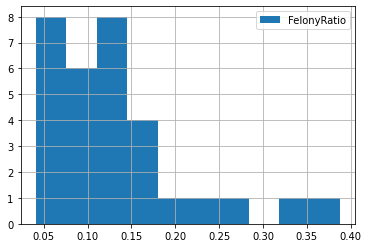

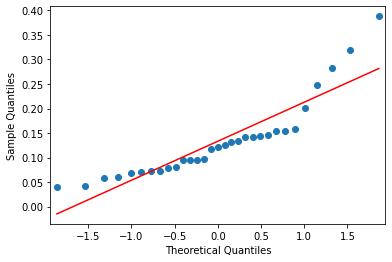

In [25]:
result_2009["FelonyRatio"].hist(legend=True)
sm.qqplot(result_2009.loc[:, "FelonyRatio"], line ='s')
py.show()

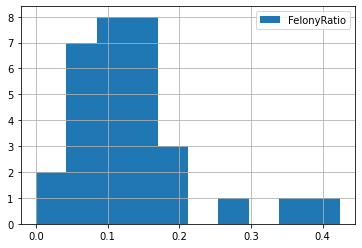

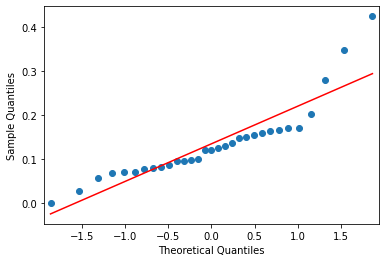

In [26]:
result_2010["FelonyRatio"].hist(legend=True)
sm.qqplot(result_2010.loc[:, "FelonyRatio"], line ='s')
py.show()

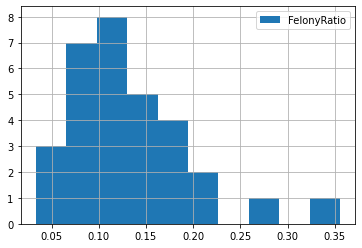

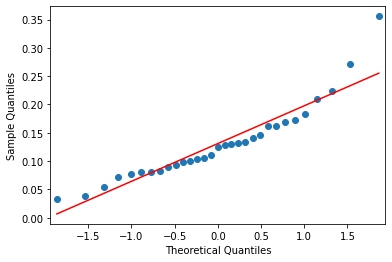

In [27]:
result_2011["FelonyRatio"].hist(legend=True)
sm.qqplot(result_2011.loc[:, "FelonyRatio"], line ='s')
py.show()

<br><br>
As we can see, the data doesn't look normal in these graphs, let us conduct some normality tests to verify.
<br><br>

Test for Year:  2009

Q-Q Plot


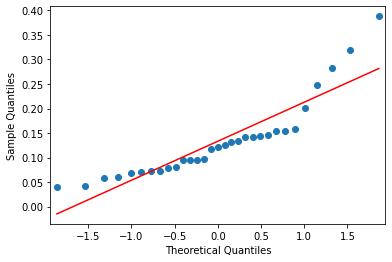


Shapiro Wilk Test
Statistics=0.839, p=0.000 
Sample does not look Gaussian (reject H0)


Anderson-Darling Test

Statistic: 1.623
15.000: 0.522, data does not look normal (reject H0)


10.000: 0.595, data does not look normal (reject H0)


5.000: 0.713, data does not look normal (reject H0)


2.500: 0.832, data does not look normal (reject H0)


1.000: 0.990, data does not look normal (reject H0)


Test for Year:  2010

Q-Q Plot


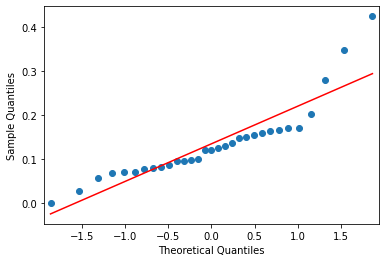


Shapiro Wilk Test
Statistics=0.850, p=0.000 
Sample does not look Gaussian (reject H0)


Anderson-Darling Test

Statistic: 1.475
15.000: 0.522, data does not look normal (reject H0)


10.000: 0.595, data does not look normal (reject H0)


5.000: 0.713, data does not look normal (reject H0)


2.500: 0.832, data does not look normal (reject H0)


1.000: 0.990, data does not look normal (reject H0)


Test for Year:  2011

Q-Q Plot


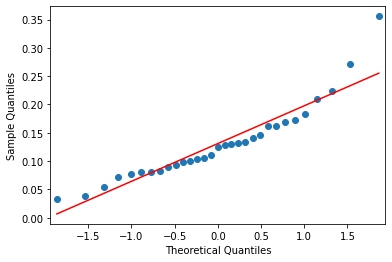


Shapiro Wilk Test
Statistics=0.901, p=0.007 
Sample does not look Gaussian (reject H0)


Anderson-Darling Test

Statistic: 0.826
15.000: 0.522, data does not look normal (reject H0)


10.000: 0.595, data does not look normal (reject H0)


5.000: 0.713, data does not look normal (reject H0)


2.500: 0.832, data looks normal (fail to reject H0)


1.000: 0.990, data looks normal (fail to reject H0)




In [28]:
df_list = [result_2009, result_2010, result_2011]
for i in range(3):
#     try:
    print("Test for Year: ", (i+2009))
    print('\nQ-Q Plot')
    qqplot(df_list[i]['FelonyRatio'], line='s')
    plt.show()
    print('\nShapiro Wilk Test')
    stat, p = shapiro(df_list[i]['FelonyRatio'])
    print('Statistics=%.3f, p=%.3f ' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n\n')
    print('Anderson-Darling Test\n')
    result = anderson(df_list[i]['FelonyRatio'])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for j in range(len(result.critical_values)):
        sl, cv = result.significance_level[j], result.critical_values[j]
        if result.statistic < result.critical_values[j]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)\n\n' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)\n\n' % (sl, cv))

<br><br>
Hence, we can conclude that the data is not normal. We will proceed with using the Chi-Square test.

A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test and variants thereof. Pearson's chi-squared test is used to determine whether there is a statistically significant difference between the expected frequencies and the observed frequencies in one or more categories of a contingency table.

Let us first check if the Felony Crime Ratio is related to Police Strength.
<br><br><br><br>

In [29]:
result_2009["PolVPop"] = result_2009["2,009.00"]/result_2009["POPULATION 2011"]

In [30]:
result_2010["PolVPop"] = result_2010["2,010.00"]/result_2010["POPULATION 2011"]

In [31]:
result_2011["PolVPop"] = result_2011["2,011.00"]/result_2011["POPULATION 2011"]

In [32]:
def hypothesistesting(df, column1, column2):
    contigency_pct = pd.crosstab(df[column1], df[column2], normalize='index')
#     print(contigency_pct)
    c, p, dof, expected = chi2_contingency(contigency_pct)
    print("p-value: ", p)
    if(p>=0.05):
        print("Do not reject Null Hypothesis, the columns are not independent")
    else:
        print("Reject Null Hypothesis, the columns are independent")

In [33]:
hypothesistesting(result_2009, "FelonyRatio", "PolVPop")

p-value:  0.23719675904068735
Do not reject Null Hypothesis, the columns are not independent


In [34]:
hypothesistesting(result_2010, "FelonyRatio", "PolVPop")

p-value:  0.2371967590406865
Do not reject Null Hypothesis, the columns are not independent


In [35]:
hypothesistesting(result_2011, "FelonyRatio", "PolVPop")

p-value:  0.23719675904068735
Do not reject Null Hypothesis, the columns are not independent


## Data Prediction

Since we are working with minimal data, we will implement statistical methods for predicting the consequent crime numbers in all the states. The method we will be employing is the Moving Average (MA) technique.
<br><br>
MA is a popular method to smooth out random movements in time-series data. Similar to a sliding window, an MA is an average that moves along the time scale/periods; older data points get dropped as newer data points are added. 
<br><br>
Two types of MA are most preferred: <b>Simple MA</b> and <b>Exponential MA</b>.

In [36]:
crime_rate_df = pd.DataFrame()
crime_rate_df["STATE/UT"] = result_2009["STATE/UT"]
crime_rate_df["Crime_2009"] = result_2009["TotalCrimes"]
crime_rate_df["Crime_2010"] = result_2010["TotalCrimes"]
crime_rate_df["Crime_2011"] = result_2011["TotalCrimes"]
crime_rate_df.head(40)

,STATE/UT,Crime_2009,Crime_2010,Crime_2011
14,KERALA,167585.0,202020.0,216821.0
15,LAKSHADWEEP,234.0,15.0,80.0
22,PUDUCHERRY,6821.0,5756.0,5877.0
10,HIMACHAL PRADESH,20002.0,19806.0,18684.0
1,ANDHRA PRADESH,257362.0,253717.0,265326.0
8,GUJARAT,167400.0,174372.0,179616.0
24,RAJASTHAN,201612.0,188582.0,193386.0
26,TAMIL NADU,225840.0,227070.0,237823.0
20,MIZORAM,2926.0,3072.0,2361.0
16,MADHYA PRADESH,351067.0,360209.0,354117.0


### Simple MA

SMA, short for Simple Moving Average, calculates the average over a specific number of periods in that range. The formula for SMA is:

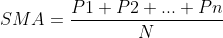

, where Pn = the crime rate at time point n, N = the number of time points.

For this exercise of building an SMA model, we’ll use the Python code below.

In [37]:
crime_rate_df["Predicted_Crime_SMA"] = crime_rate_df.loc[:, ["Crime_2009", "Crime_2010", "Crime_2011"]].mean(axis=1).round(decimals = 0)
crime_rate_df.head(40)

,STATE/UT,Crime_2009,Crime_2010,Crime_2011,Predicted_Crime_SMA
14,KERALA,167585.0,202020.0,216821.0,195475.0
15,LAKSHADWEEP,234.0,15.0,80.0,110.0
22,PUDUCHERRY,6821.0,5756.0,5877.0,6151.0
10,HIMACHAL PRADESH,20002.0,19806.0,18684.0,19497.0
1,ANDHRA PRADESH,257362.0,253717.0,265326.0,258802.0
8,GUJARAT,167400.0,174372.0,179616.0,173796.0
24,RAJASTHAN,201612.0,188582.0,193386.0,194527.0
26,TAMIL NADU,225840.0,227070.0,237823.0,230244.0
20,MIZORAM,2926.0,3072.0,2361.0,2786.0
16,MADHYA PRADESH,351067.0,360209.0,354117.0,355131.0


### Exponential MA

Different from SMA, which assigns equal weights to all historical data points, EMA, short for Exponential Moving Average, applies higher weights to recent prices, i.e., tail data points of the 50-day MA in our example. The magnitude of the weighting factor depends on the number of time periods. The formula to calculate EMA is:

 ,

where Pt = the price at time point t, 

EMAt-1 = EMA at time point t-1, 

N = number of time points in EMA,

and weighting factor k = 2/(N+1).

One advantage of the EMA over SMA is that EMA is more responsive to price changes, which makes it useful for short-term trading. Here’s a Python implementation of EMA:

In [38]:
temp = crime_rate_df.loc[:, ["Crime_2009", "Crime_2010", "Crime_2011"]].ewm(span=3, axis=1).mean()
crime_rate_df["Predicted_Crime_EMA"] = temp.mean(axis = 1).round(decimals = 0)
crime_rate_df.head(40)

,STATE/UT,Crime_2009,Crime_2010,Crime_2011,Predicted_Crime_SMA,Predicted_Crime_EMA
14,KERALA,167585.0,202020.0,216821.0,195475.0,187895.0
15,LAKSHADWEEP,234.0,15.0,80.0,110.0,135.0
22,PUDUCHERRY,6821.0,5756.0,5877.0,6151.0,6303.0
10,HIMACHAL PRADESH,20002.0,19806.0,18684.0,19497.0,19689.0
1,ANDHRA PRADESH,257362.0,253717.0,265326.0,258802.0,257722.0
8,GUJARAT,167400.0,174372.0,179616.0,173796.0,171940.0
24,RAJASTHAN,201612.0,188582.0,193386.0,194527.0,195909.0
26,TAMIL NADU,225840.0,227070.0,237823.0,230244.0,228513.0
20,MIZORAM,2926.0,3072.0,2361.0,2786.0,2865.0
16,MADHYA PRADESH,351067.0,360209.0,354117.0,355131.0,354550.0


## Data Visualisation

Here, we start visualising the data we have consolidated over the weeks and see if we can reach any conclusions based on the graphs plotted
<br><br>

Let us start with the visualisation of the predicted numbers of crime rate.

<AxesSubplot:xlabel='STATE/UT'>

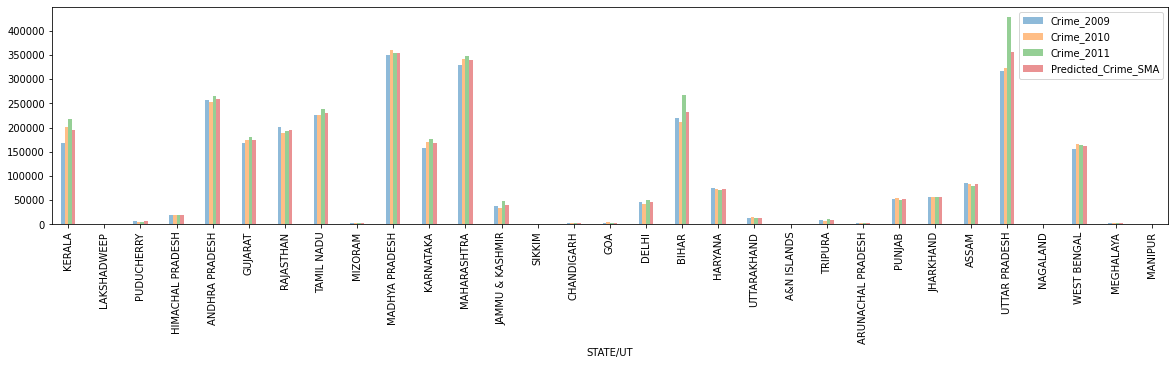

In [39]:
crime_rate_df.plot.bar(x='STATE/UT', y=["Crime_2009", "Crime_2010", "Crime_2011", "Predicted_Crime_SMA"],  width = 0.4,alpha=0.5, figsize=[20, 4])

<AxesSubplot:xlabel='STATE/UT'>

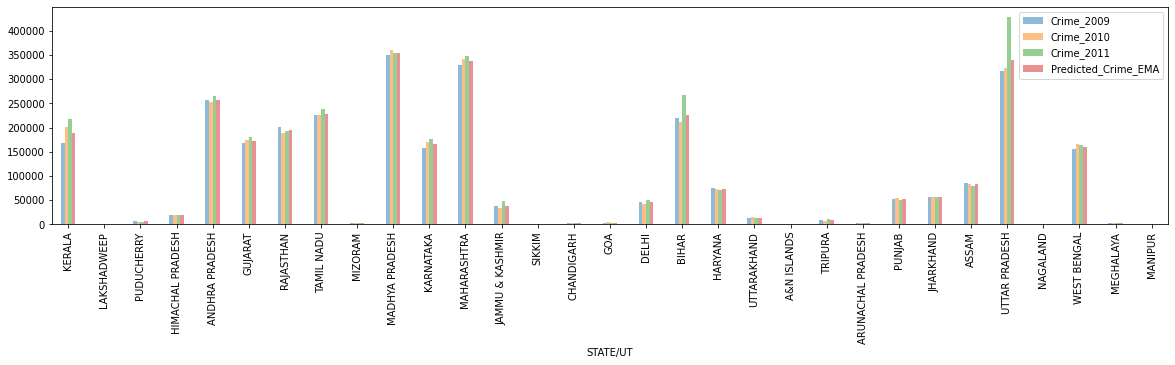

In [40]:
crime_rate_df.plot.bar(x='STATE/UT', y=["Crime_2009", "Crime_2010", "Crime_2011", "Predicted_Crime_EMA"],  width = 0.4,alpha=0.5, figsize=[20, 4])

<br><br>
As we have to stick to absolute numbers in this case the graph shown is not apt. Hence, moving forward we will use only ratios for visualisation, starting with the Crime per Capita for each state.
<br><br>

<AxesSubplot:ylabel='STATE/UT Party'>

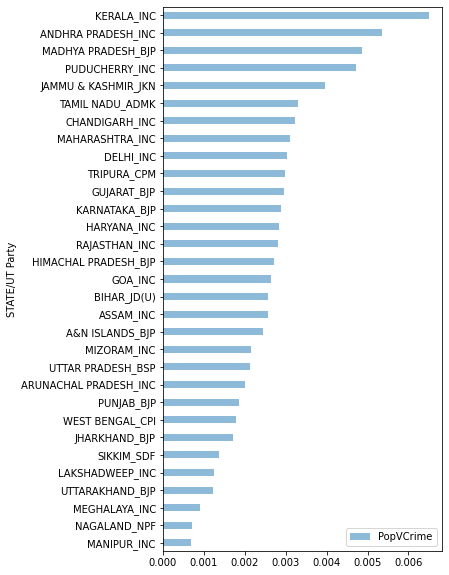

In [41]:
result_2011["PopVCrime"] = result_2011["TotalCrimes"]/result_2011["POPULATION 2011"]
result_2011.sort_values(by=["PopVCrime"], inplace=True)
result_2011.plot.barh(x='STATE/UT Party', y="PopVCrime",  width = 0.4,alpha=0.5, figsize=[5, 10], sort_columns=True)

<br><br>
Here, we see that Kerala, led by the Indian National Congress, has the highest Crime committed per capita and Manipur which is also led by the INC has the lowest Crime committed per capita.

Now, lets check the ratio of felony and misdemeanors statewise and over the 3 years.
<br><br>

<AxesSubplot:xlabel='STATE/UT Party'>

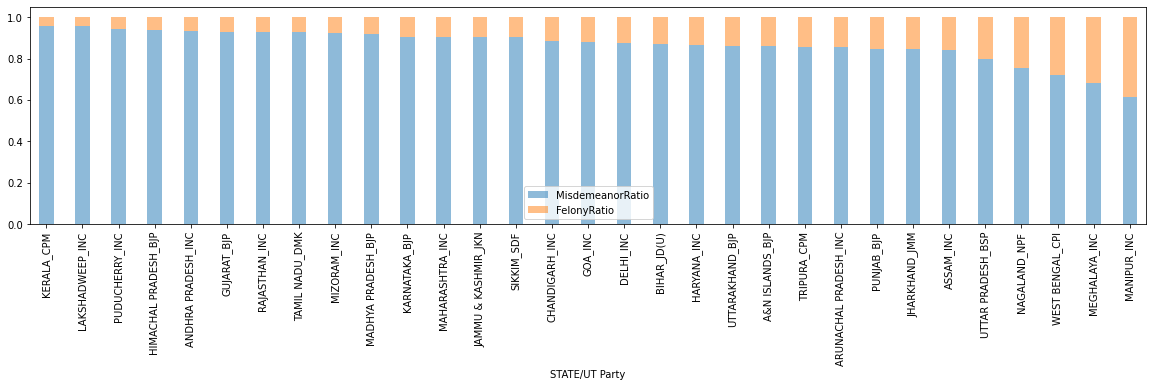

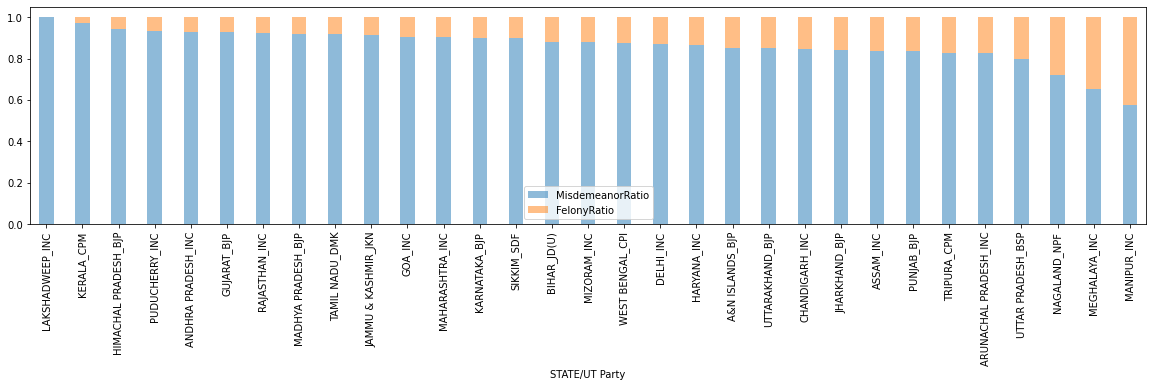

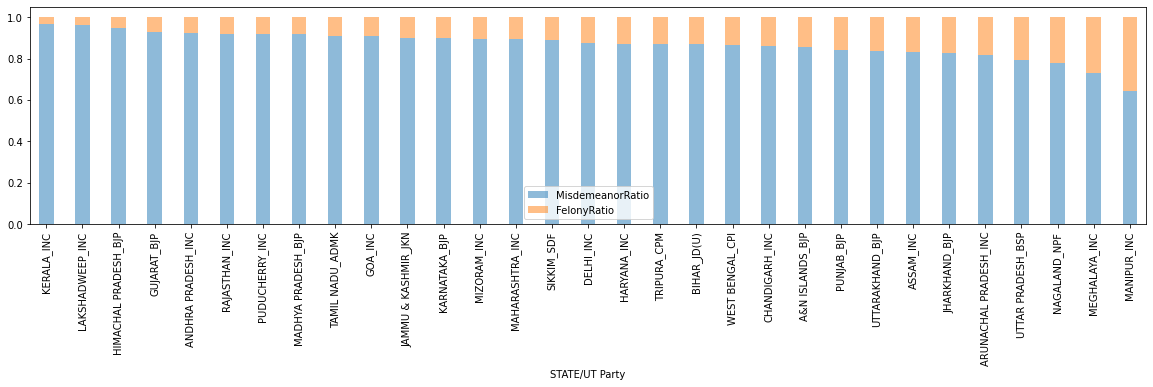

In [42]:
result_2011.sort_values(by=["FelonyRatio"], inplace=True)
result_2009.plot.bar(x='STATE/UT Party', y=["MisdemeanorRatio", "FelonyRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[20, 4])
result_2010.plot.bar(x='STATE/UT Party', y=["MisdemeanorRatio", "FelonyRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[20, 4])
result_2011.plot.bar(x='STATE/UT Party', y=["MisdemeanorRatio", "FelonyRatio"],  stacked=True,  width = 0.4,alpha=0.5, figsize=[20, 4])

<br><br>
It is very interesting to note that the state with the lowest Crime committed per capita had a very high ratio of Felonies committed compared to the states with relatively high crime per capita
<br><br>

<AxesSubplot:ylabel='STATE/UT'>

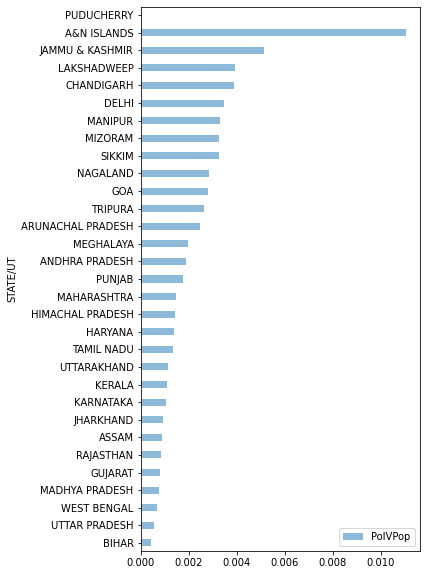

In [43]:
result_2011.sort_values(by=["PolVPop"], inplace=True)
result_2011.plot.barh(x='STATE/UT', y="PolVPop",  width = 0.4,alpha=0.5, figsize=[5, 10], sort_columns=True)

<AxesSubplot:xlabel='STATE/UT Party'>

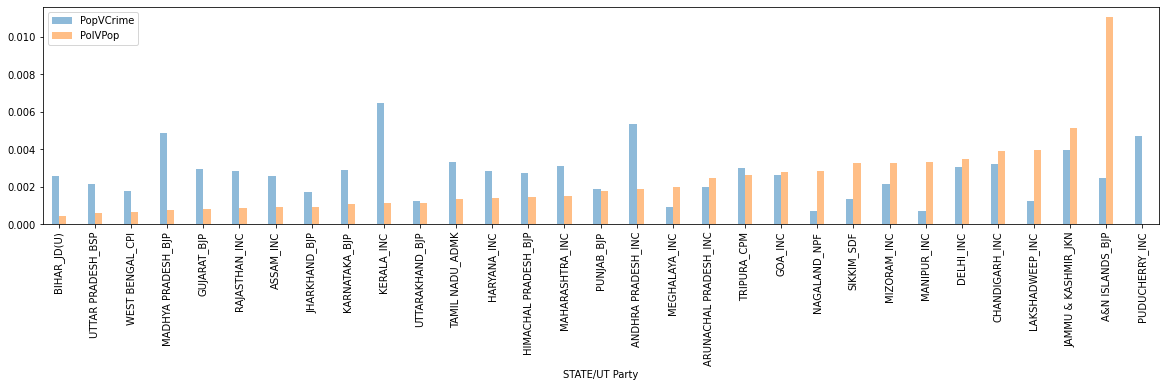

In [44]:
result_2011.plot.bar(x='STATE/UT Party', y=["PopVCrime", "PolVPop"],  width = 0.4,alpha=0.5, figsize=[20, 4])

<br><br>
We can clearly see, as the number of police per capita increases, the Crime numbers also drop.
<br><br>

<AxesSubplot:title={'center':'Crime per capita for party in power'}, xlabel='Party'>

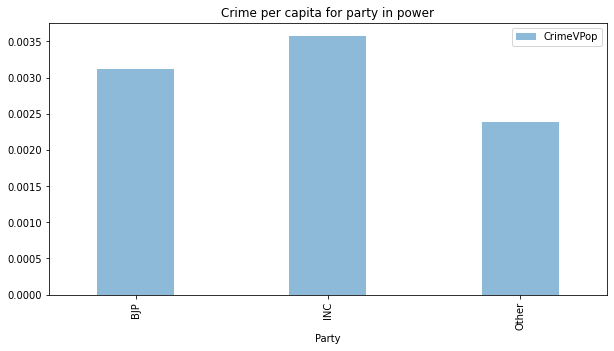

In [45]:
data = {'Party':['BJP', 'INC', 'Other'],
        'Crime':[0,0,0],
       'Population':[0,0,0]}
df = pd.DataFrame(data)
for i in range(len(result_2011)):
    if (result_2011.loc[i, "Party"] == "BJP"):
        df.loc[0, ["Crime", "Population"]] = [df.iloc[0, 1]+result_2011.loc[i, "TotalCrimes"], df.iloc[0, 2]+result_2011.loc[i, "POPULATION 2011"]]
    elif (result_2011.loc[i, "Party"] == "INC"):
        df.loc[1, ["Crime", "Population"]] = [df.iloc[1, 1]+result_2011.loc[i, "TotalCrimes"], df.iloc[1, 2]+result_2011.loc[i, "POPULATION 2011"]]
    else:
        df.loc[2, ["Crime", "Population"]] = [df.iloc[2, 1]+result_2011.loc[i, "TotalCrimes"], df.iloc[2, 2]+result_2011.loc[i, "POPULATION 2011"]]

df["CrimeVPop"] = df["Crime"]/df["Population"]
df.plot.bar(x='Party', y="CrimeVPop",  width = 0.4,alpha=0.5, figsize=[10, 5], sort_columns=True, title="Crime per capita for party in power")

## Conclusion

Here is a list of trends observed:

<ol>
    <li>States with High Crime per capita had lower percentage of felonies</li>
    <li>States with greater police strength per capita had lower Crime</li>
    <li>States under INC had higher Crime per capita compared to other parties</li>
</ol>